# Plotting Shots

## Setup

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Data

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69301)

team1, team2 = df["team_name"].unique()

shot_mask = df["type_name"] == "Shot"
shots = df.loc[shot_mask].set_index('id')

## Simple Plot
### Iterative Solution

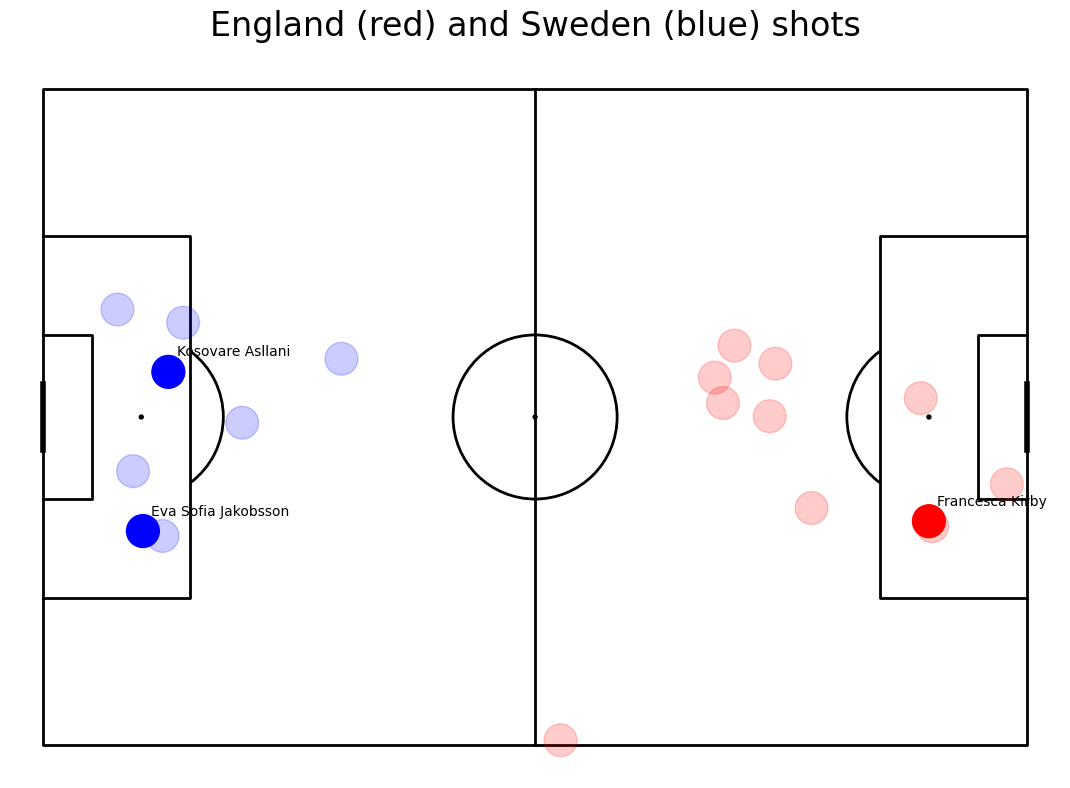

In [4]:
pitch = Pitch(line_color="black")
fig, ax = pitch.draw(figsize=(15,8))
pitchLengthX = 120
pitchWidthY = 80

for i, shot in shots.iterrows():
    x = shot["x"]
    y = shot["y"]
    goal = shot["outcome_name"]=="Goal"
    team_name = shot["team_name"]
    circleSize=2

    if team_name == team1:
        if goal:
            shotCircle = plt.Circle((x,y), circleSize, color="Red")
            plt.text(x+1, y-2, shot["player_name"])
        else:
            shotCircle = plt.Circle((x,y), circleSize, color="Red")
            shotCircle.set_alpha(.2)
    
    else:
        if goal:
            shotCircle = plt.Circle((pitchLengthX-x, pitchWidthY - y), circleSize, color="Blue")
            plt.text(pitchLengthX-x+1, pitchWidthY - y - 2, shot["player_name"])
        else:
            shotCircle = plt.Circle((pitchLengthX-x,pitchWidthY-y), circleSize, color="Blue")
            shotCircle.set_alpha(.2)
    
    ax.add_patch(shotCircle)

fig.suptitle("England (red) and Sweden (blue) shots", fontsize = 24)
fig.set_size_inches(15,8)
plt.show();

### Using mplsoccr `Pitch`

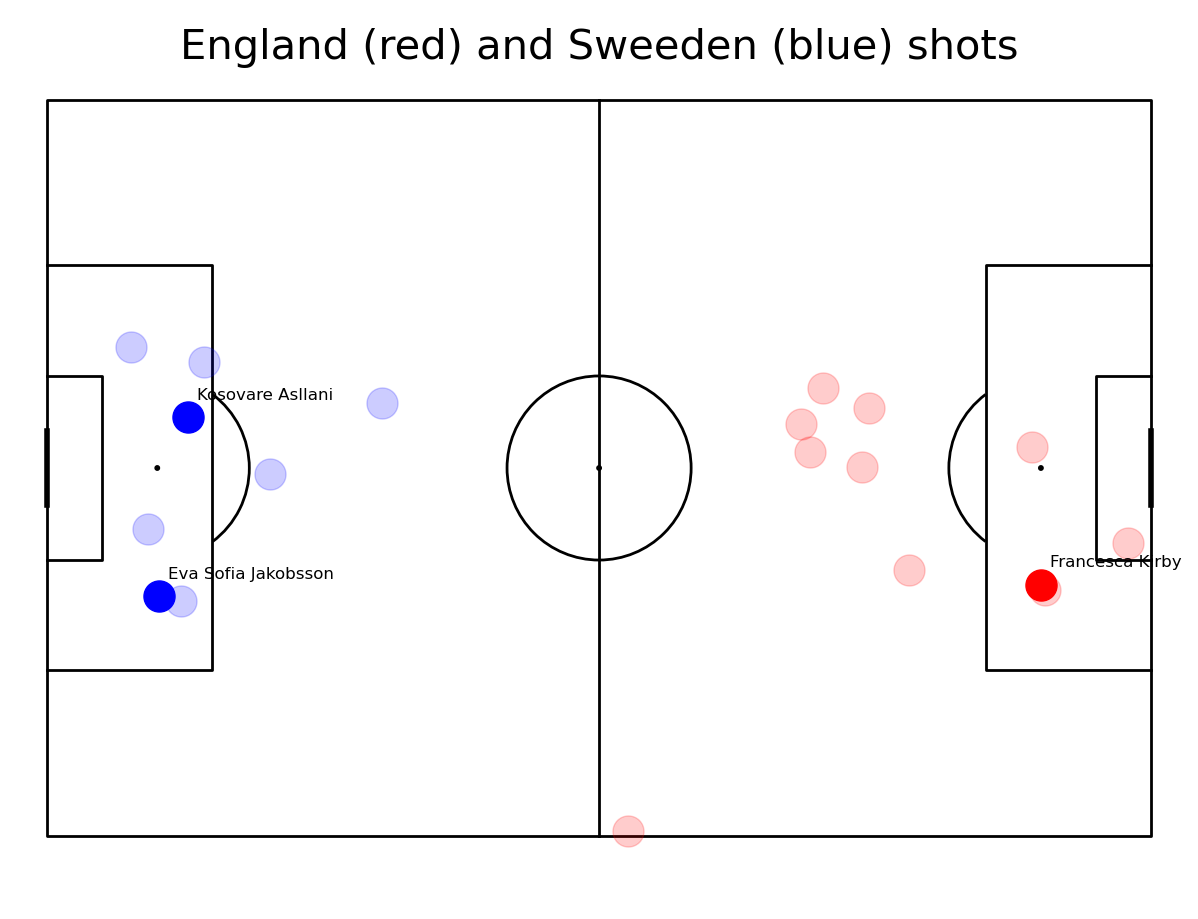

In [10]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_england = (df["type_name"] == "Shot") & (df["team_name"] == team1)
df_england = df.loc[mask_england, ["x", "y", "outcome_name", "player_name"]]

for i, row in df_england.iterrows():
    if row["outcome_name"] == "Goal":
        pitch.scatter(row.x, row.y, alpha=1, s=500, color="red", ax=ax["pitch"])
        pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax["pitch"], fontsize=12)
    else:
        pitch.scatter(row.x, row.y, alpha=.2, s=500, color="red", ax=ax["pitch"])

mask_sweden = (df["type_name"] == "Shot") & (df["team_name"] == team2)
df_sweden = df.loc[mask_sweden, ["x", "y", "outcome_name", "player_name"]]

for i, row in df_sweden.iterrows():
    if row["outcome_name"] == "Goal":
        pitch.scatter(120 - row.x, 80 - row.y, alpha=1, s=500, color="blue", ax=ax["pitch"])
        pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax["pitch"], fontsize=12)
    else:
        pitch.scatter(120 - row.x, 80 - row.y, alpha=.2, s=500, color="blue", ax=ax["pitch"])

fig.suptitle("England (red) and sweden (blue) shots", fontsize=30)
plt.show();

### Plotting Shots on one half

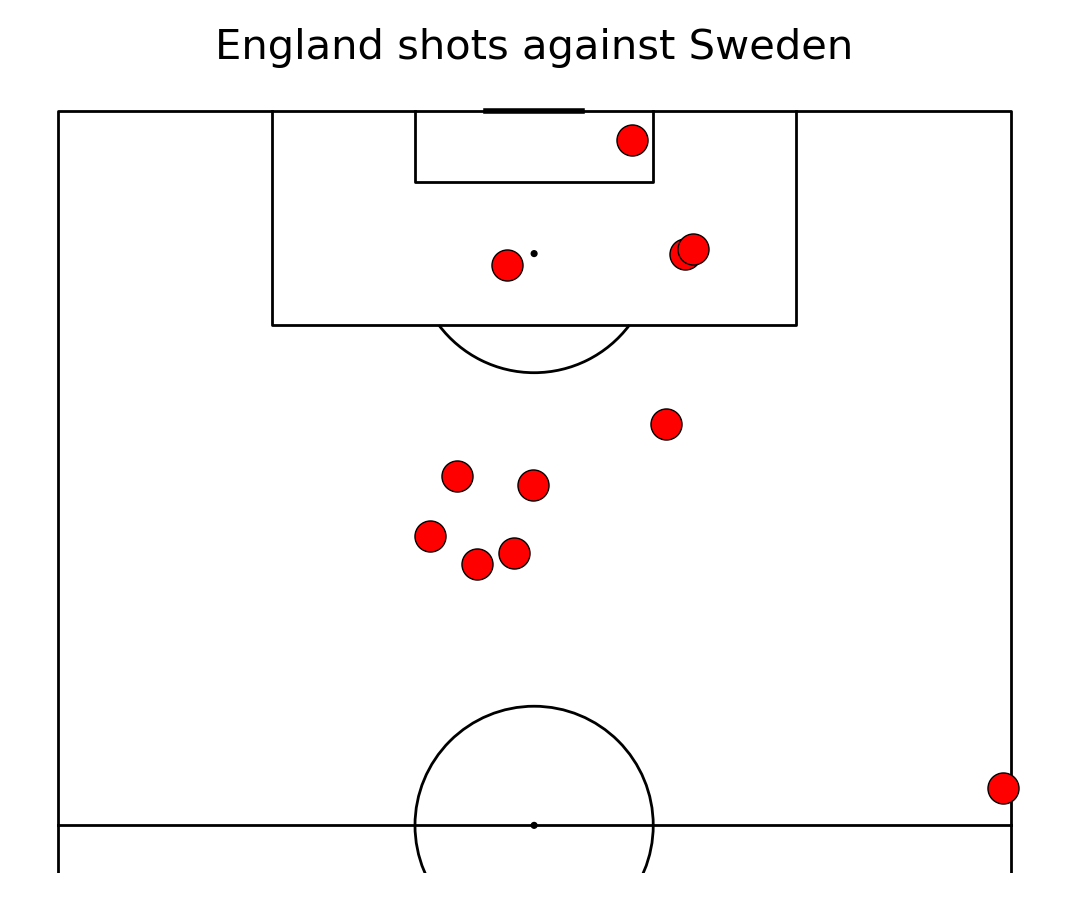

In [11]:
pitch = VerticalPitch(line_color="black", half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

pitch.scatter(df_england.x, df_england.y, alpha=1, s=500, color="red", ax=ax["pitch"], edgecolors="black")
fig.suptitle("England shots against Sweden", fontsize=30)
plt.show();

### Challenges

#### 1. DF of all passes in the game.

In [25]:
pass_mask = df["pass_recipient_id"].isnull() != True
pass_df = df.loc[pass_mask]
pass_df.head(10)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,dribble_overrun,block_deflection,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name
4,8d5673e4-0d1b-48a1-8945-38f7ea98c548,5,1,00:00:00.140000,0,0,2,0.168730,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,56fa96cb-0ee2-4414-be1c-ab35887c7431,9,1,00:00:05.143000,0,5,2,1.173625,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,de86424c-7015-4948-b898-015377a67f07,12,1,00:00:07.844000,0,7,2,1.019100,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,ef4b5f7d-1989-4dba-b37e-d59b41abee14,15,1,00:00:10.586000,0,10,2,0.700000,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,b3dd00b7-b5de-4d00-9931-5e5bc5e6323f,22,1,00:00:26.656000,0,26,3,1.547657,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3b66e389-20f6-488f-8def-790498e95faf,25,1,00:00:29.755000,0,29,3,1.345400,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,7160ea24-1cdb-4413-a3ea-f8781df83056,28,1,00:00:33.426000,0,33,3,0.928670,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,8dda9a83-5f98-47ca-b7f2-4b507bdcece3,32,1,00:00:37.033000,0,37,3,1.598765,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,cb007141-952b-4075-92f0-f4c01e5c5c91,36,1,00:00:39.968000,0,39,3,3.361400,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,24c5d24c-0a29-4ffd-a80c-c02aff3d5e9f,39,1,00:00:57.167000,0,57,4,1.050060,69301,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Sweden Passes

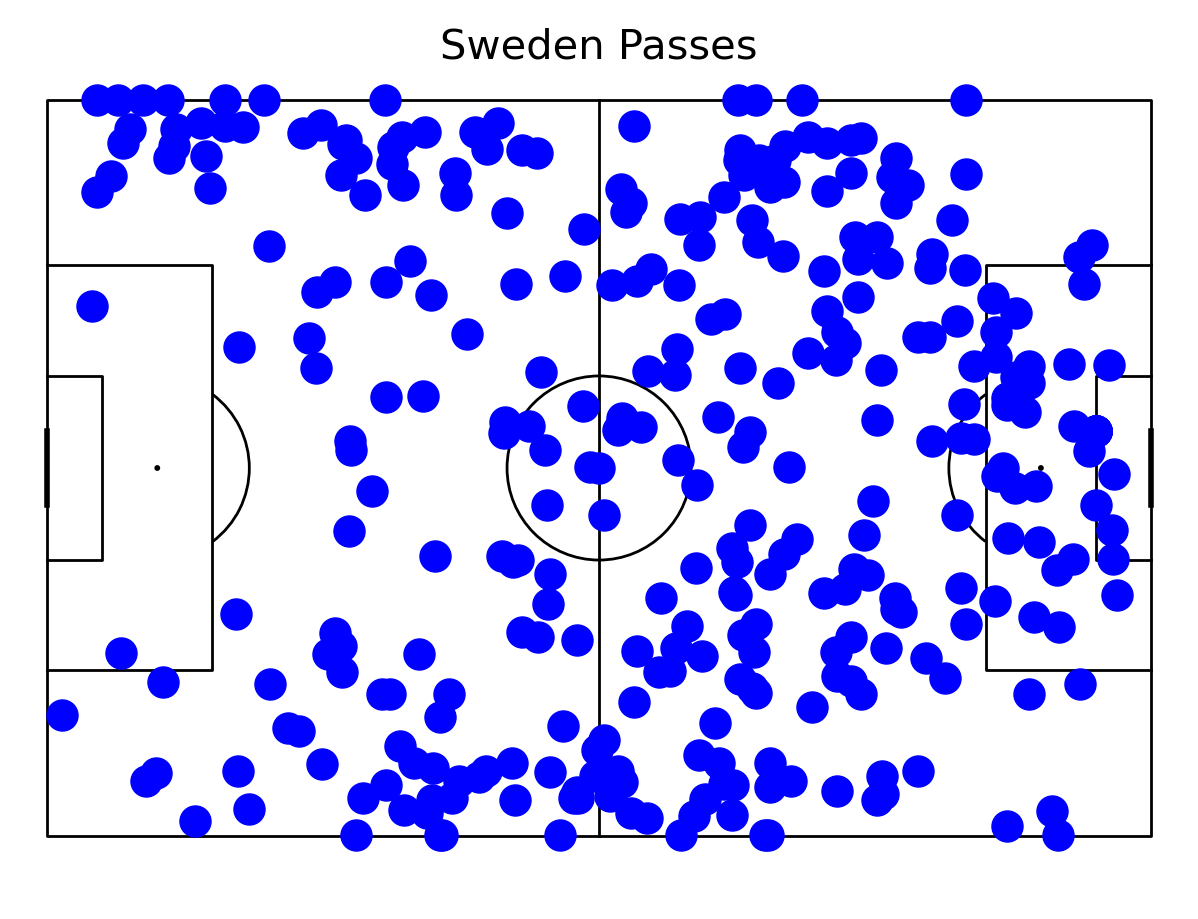

In [41]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_sweden = pass_df["team_name"] == team2
df_pass_sweden = pass_df.loc[mask_sweden, ["x", "y", "player_name"]]

for i, row in df_pass_sweden.iterrows():
    pitch.scatter(120 - row.x, 80 - row.y, alpha=1, s=500, color="blue", ax=ax["pitch"])

fig.suptitle("Sweden Passes", fontsize=30)
plt.show();

#### 3. Passes only made by Caroline Seger (Sara Caroline Seger)

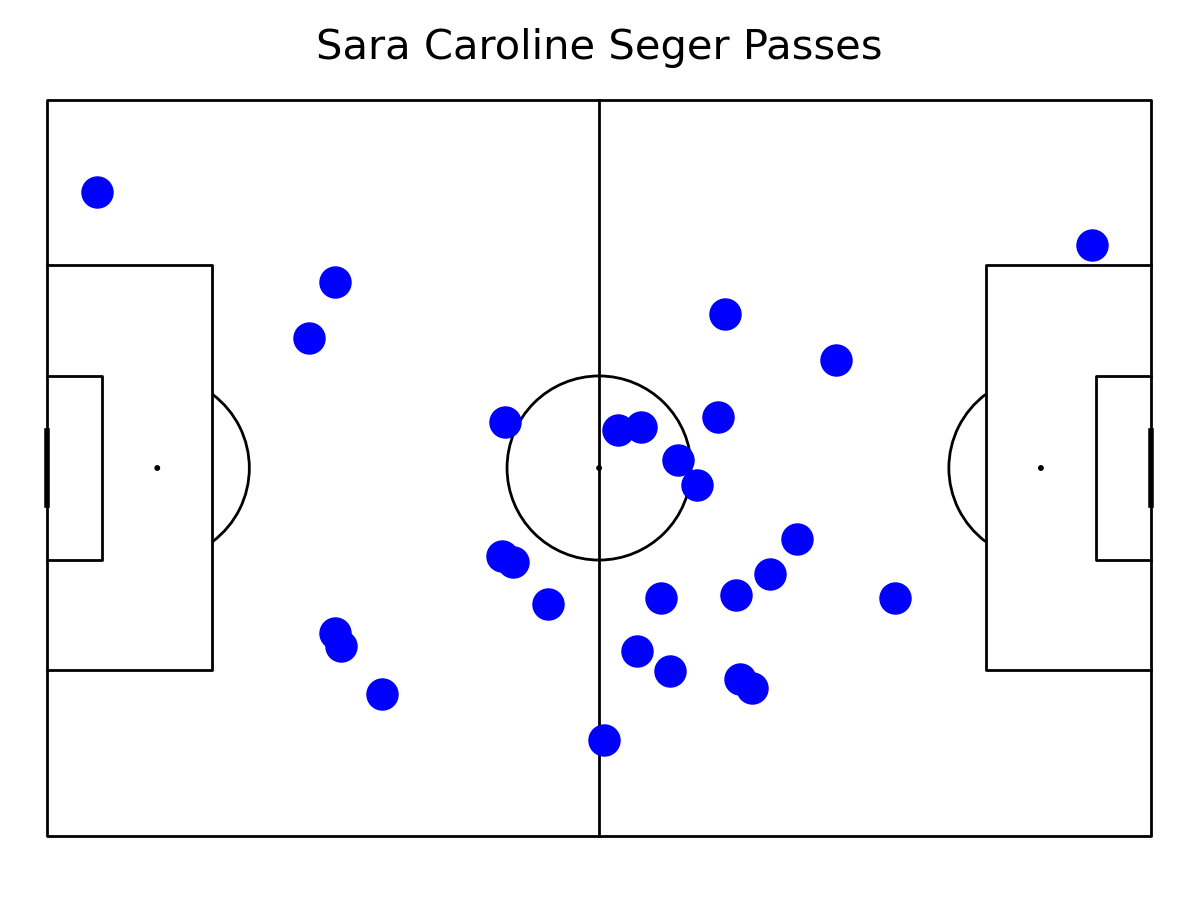

In [40]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_player = pass_df["player_name"] == "Sara Caroline Seger"
df_pass_player = pass_df.loc[mask_player, ["x", "y", "player_name"]]

for i, row in df_pass_player.iterrows():
    pitch.scatter(120 - row.x, 80 - row.y, alpha=1, s=500, color="blue", ax=ax["pitch"])

fig.suptitle("Sara Caroline Seger Passes", fontsize=30)
plt.show();

#### 4. Passes with Arrows

#### Sweden Passes with Arrows

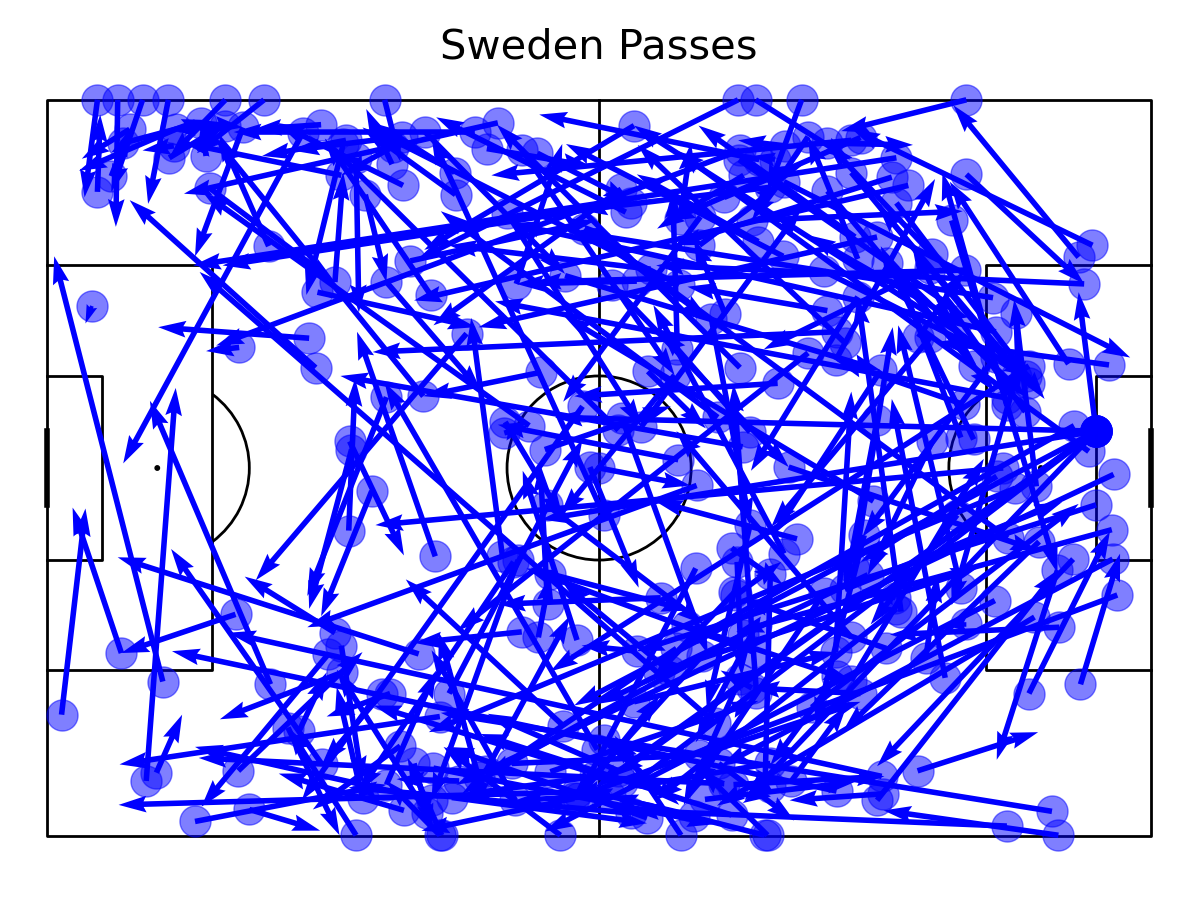

In [59]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_sweden = pass_df["team_name"] == team2
df_pass_sweden = pass_df.loc[mask_sweden, ["x", "y", "end_x", "end_y", "player_name"]]

for i, row in df_pass_sweden.iterrows():
    pitch.scatter(120 - row.x, 80 - row.y, alpha=.5, s=500, color="blue", ax=ax["pitch"])
    pitch.arrows(120 - row.x, 80 - row.y, 120 - row.end_x, 80 - row.end_y, alpha=1, color="blue", ax=ax["pitch"])

fig.suptitle("Sweden Passes", fontsize=30)
plt.show();

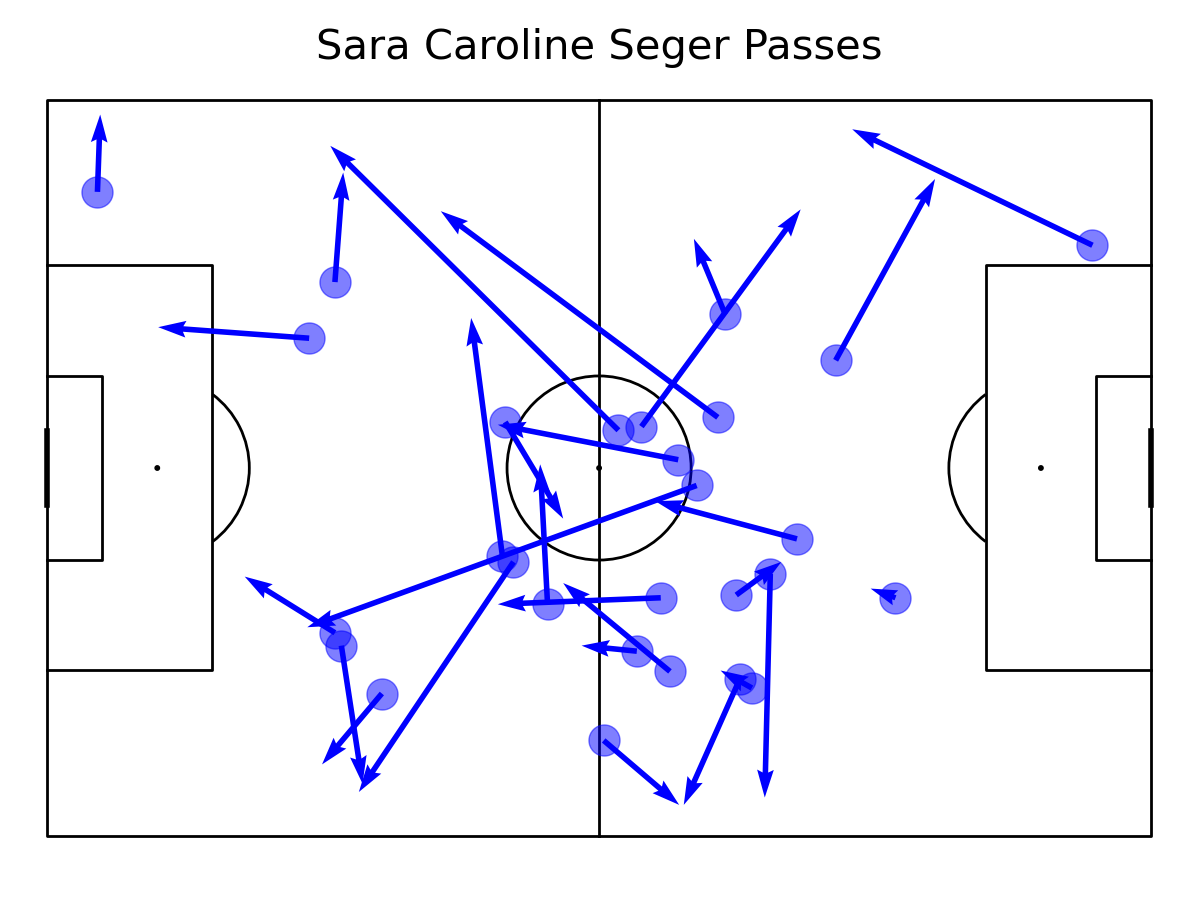

In [62]:
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

mask_player = pass_df["player_name"] == "Sara Caroline Seger"
df_pass_player = pass_df.loc[mask_player, ["x", "y", "end_x", "end_y", "player_name"]]

for i, row in df_pass_player.iterrows():
    pitch.scatter(120 - row.x, 80 - row.y, alpha=.5, s=500, color="blue", ax=ax["pitch"])
    pitch.arrows(120 - row.x, 80 - row.y, 120 - row.end_x, 80 - row.end_y, alpha=1, color="blue", ax=ax["pitch"])

fig.suptitle("Sara Caroline Seger Passes", fontsize=30)
plt.show();